---
# April_25_20_Sharp_RD_with_Stata_and_R
---
* Name: Jikhan Jeong
* Ref: https://www.masteringmetrics.com/resources/ (Stata)
* Ref: https://jrnold.github.io/masteringmetrics/mlda-regression-discontinuity.html (R)
* Ref: Matering Metrics: Chapter 4. RD analysis of the minimum legal drinking age (MLDA).
* Table 4.1 and Figures 4.2, 4.4, and 4.5 in Mastering Metrics.
* Table 4.1 presents sharp RD estimates of the effect of the minimum legal drinking age (MLDA) on mortality.
* Paper(2009, AEJ) : http://masteringmetrics.com/wp-content/uploads/2015/01/Carpenter-and-Dobkin-2009.pdf
* Paper(2011, JEP) : http://masteringmetrics.com/wp-content/uploads/2015/01/Carpenter-and-Dobkin-2011.pdf
* DF: AEJfigs.dta
---

In [1]:
!pwd


/data/cahnrs/jikhan.jeong/stata kernel 


---
### outreg2 
---
* gives you the type of presentation you see in academic papers. 
* Ref:  : https://www.princeton.edu/~otorres/Outreg2.pdf

---
# <font color = blue> Part 1. Stata
---
* Ref: https://www.masteringmetrics.com/resources/
* Ref: http://masteringmetrics.com/wp-content/uploads/2015/01/master_cd_rd.do (do file)
---

In [1]:
use "AEJfigs.dta", clear

In [2]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     agecell |         50          21    1.126957   19.06849   22.93151
         all |         48    95.67272    3.831062   88.42776   105.2683
   allfitted |         50    95.80284    3.286415   91.70615   102.8918
    internal |         48    20.28529    2.253907   15.97709   24.37291
internalfi~d |         50     20.2813    1.994682   16.73813   24.04378
-------------+---------------------------------------------------------
    external |         48    75.38743    2.986008   71.34142   83.33099
externalfi~d |         50    75.52154    2.269976   73.15786   81.78372
     alcohol |         48    1.257337    .3503116    .639138   2.519309
alcoholfit~d |         50    1.267447    .2598618   .7943445   1.817361
    homicide |         48    16.91207    .7299822   14.94773   18.41097
-------------+-------------------------------------------------

In [3]:
list in 1/5


     +----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
     |  agecell        all   allfit~d   internal   intern~d   external   extern..    alcohol   alcoho~d   homicide   homici~d    suicide   suicid~d        mva   mvafit~d      drugs   drugsf~d   extern~r   ~rfitted |
     |----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
  1. | 19.06849    92.8254   91.70615   16.61759   16.73813   76.20782   74.96801    .639138   .7943445   16.31682   16.28457   11.20371    11.5921   35.82933   34.81778   3.872425   3.448835   8.534373   8.388236 |
  2. | 19.15068   95.10074   91.88372   18.32768   16.92065   76.77306   74.96307   .6774093   .8375749   16.85996    16.2707   12.1933

In [4]:
* All = all deaths
gen age = agecell - 21
gen over21 = agecell >= 21

In [5]:
* age2 = age square
* over_age = interation term between over21 dummy and age
gen age2 = age^2
gen over_age = over21*age
gen over_age2 = over21*age2

---
### Regressions for Figure 4.2 : Sharp RDD
---
* linear trend, and linear on each side
* Minimm legal drinking age (MLDA) cutoff in age 21, cutoff dummy is a function of age (=running variable)
---

In [6]:
reg all age over21
predict allfitlin



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(2, 45)        =     32.99
       Model |  410.138151         2  205.069075   Prob > F        =    0.0000
    Residual |  279.682408        45  6.21516463   R-squared       =    0.5946
-------------+----------------------------------   Adj R-squared   =    0.5765
       Total |  689.820559        47  14.6770332   Root MSE        =     2.493

------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.9746843   .6324613    -1.54   0.130    -2.248527    .2991581
      over21 |   7.662709   1.440286     5.32   0.000     4.761824    10.56359
       _cons |   91.84137   .8050394   114.08   0.000     90.21994     93.4628
-------------------------------------------------

In [7]:
reg all age over21 over_age
predict allfitlini



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(3, 44)        =     29.47
       Model |  460.574058         3  153.524686   Prob > F        =    0.0000
    Residual |  229.246501        44  5.21014775   R-squared       =    0.6677
-------------+----------------------------------   Adj R-squared   =    0.6450
       Total |  689.820559        47  14.6770332   Root MSE        =    2.2826

------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .8269952   .8189316     1.01   0.318     -.823453    2.477443
      over21 |   7.662709   1.318704     5.81   0.000     5.005035    10.32038
    over_age |  -3.603359   1.158144    -3.11   0.003    -5.937445   -1.269273
       _cons |   93.61837   .9324647   100.40   0

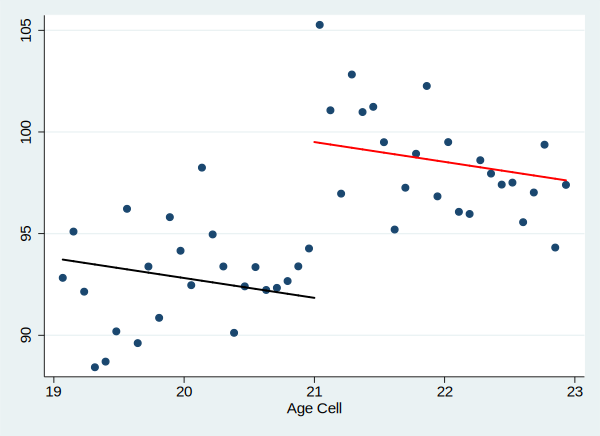





(note: file ./fig42 not found)
(file ./fig42 saved)

(note: file ./fig42.eps not found)
(file ./fig42.eps saved)


In [8]:
* Figure 4.2. Linear Sharp RD
twoway (scatter all agecell) (line allfitlin agecell if age < 0,  lcolor(black)     lwidth(medthick)) ///
                             (line allfitlin agecell if age >= 0, lcolor(red) lwidth(medthick medthick)), legend(off)
graph save "./fig42", replace
graph save "./fig42.eps", replace

---
### Regressions for Figure 4.4.
* Quadratic, and quadratic on each side
---

In [9]:
* Quadratic sharp RD
reg all age age2 over21
predict allfitq



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(3, 44)        =     28.12
       Model |  453.339903         3  151.113301   Prob > F        =    0.0000
    Residual |  236.480656        44  5.37456037   R-squared       =    0.6572
-------------+----------------------------------   Adj R-squared   =    0.6338
       Total |  689.820559        47  14.6770332   Root MSE        =    2.3183

------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.9746843   .5881378    -1.66   0.105    -2.159998    .2106296
        age2 |  -.8186505   .2887482    -2.84   0.007    -1.400584   -.2367167
      over21 |   7.662709   1.339349     5.72   0.000     4.963428    10.36199
       _cons |   92.90274   .8370061   110.99   0

In [10]:
* Quadratic sharp RD with interaction
reg all age age2 over21 over_age over_age2
predict allfitqi



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(5, 42)        =     18.02
       Model |  470.512104         5  94.1024207   Prob > F        =    0.0000
    Residual |  219.308455        42  5.22162989   R-squared       =    0.6821
-------------+----------------------------------   Adj R-squared   =    0.6442
       Total |  689.820559        47  14.6770332   Root MSE        =    2.2851

------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.8305828   3.290064    -0.25   0.802    -7.470202    5.809036
        age2 |  -.8402999   1.615268    -0.52   0.606    -4.100043    2.419443
      over21 |   9.547789   1.985277     4.81   0.000     5.541337    13.55424
    over_age |  -6.017014   4.652854    -1.29   0

In [11]:
label variable all       "Mortality rate from all causes (per 100,000)"
label variable allfitlin "Mortality rate from all causes (per 100,000)"
label variable allfitqi  "Mortality rate from all causes (per 100,000)"

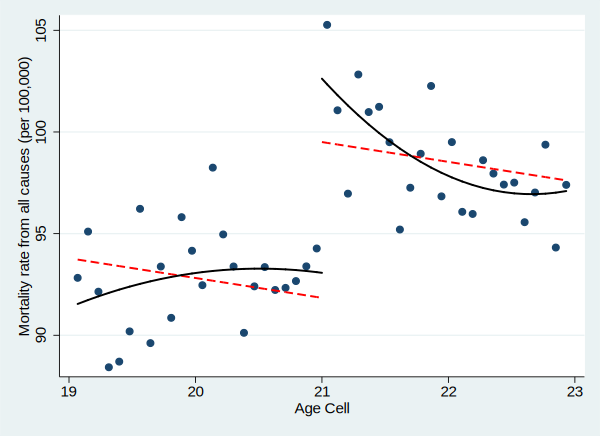





(note: file ./fig44 not found)
(file ./fig44 saved)

(note: file ./fig44.eps not found)
(file ./fig44.eps saved)


In [12]:
* Figure 4.4.		 Comparing RDD fited Y with linear and quartractic(with interaction)
* allfitlin : all fitted linear regression (Red)
* allfitqi : all fitted quardartic age variable regression (Black)
twoway (scatter all agecell) (line allfitlin allfitqi agecell if age < 0,  lcolor(red black) lwidth(medthick medthick) lpattern(dash)) ///
                             (line allfitlin allfitqi agecell if age >= 0, lcolor(red black) lwidth(medthick medthick) lpattern(dash)), legend(off)
                             
graph save "./fig44", replace
graph save "./fig44.eps", replace

---
### Regressions for Fig 4.5 for MVA
* "Motor Vehicle Accidents (MVA) " on linear, and quadratic on each side
---

In [13]:
* "Motor Vehicle Accidents (MVA) " on linear
reg mva age over21
predict exfitlin



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(2, 45)        =     53.14
       Model |  187.819794         2   93.909897   Prob > F        =    0.0000
    Residual |  79.5215648        45  1.76714588   R-squared       =    0.7025
-------------+----------------------------------   Adj R-squared   =    0.6893
       Total |  267.341359        47  5.68811402   Root MSE        =    1.3293

------------------------------------------------------------------------------
         mva |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -3.148829   .3372437    -9.34   0.000    -3.828073   -2.469585
      over21 |   4.534033   .7679953     5.90   0.000     2.987211    6.080855
       _cons |   29.35597   .4292665    68.39   0.000     28.49138    30.22055
-------------------------------------------------

In [14]:
*  "Motor Vehicle Accidents (MVA) " on quadratic 
reg mva age age2 over21 over_age over_age2
predict exfitqi



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(5, 42)        =     21.86
       Model |   193.13755         5    38.62751   Prob > F        =    0.0000
    Residual |  74.2038088        42  1.76675735   R-squared       =    0.7224
-------------+----------------------------------   Adj R-squared   =    0.6894
       Total |  267.341359        47  5.68811402   Root MSE        =    1.3292

------------------------------------------------------------------------------
         mva |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -2.933014    1.91377    -1.53   0.133    -6.795159    .9291307
        age2 |  -.1852363    .939572    -0.20   0.845    -2.081369    1.710897
      over21 |   4.662859   1.154799     4.04   0.000     2.332379    6.993338
    over_age |  -.8231342    2.70648    -0.30   0

In [15]:
* sucide ~ age + over21
reg suicide age over21
predict sufitlin



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(2, 45)        =     20.39
       Model |  25.2717131         2  12.6358566   Prob > F        =    0.0000
    Residual |  27.8835665        45  .619634811   R-squared       =    0.4754
-------------+----------------------------------   Adj R-squared   =    0.4521
       Total |  53.1552796        47   1.1309634   Root MSE        =    .78717

------------------------------------------------------------------------------
     suicide |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.1814086   .1996988    -0.91   0.369    -.5836227    .2208055
      over21 |   1.794289   .4547684     3.95   0.000     .8783385     2.71024
       _cons |   11.45484   .2541902    45.06   0.000     10.94287     11.9668
-------------------------------------------------

---
### "Internal causes" on linear, and quadratic on each side
---

In [16]:
* Linear
reg internal age over21
predict infitlin



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(2, 45)        =     89.64
       Model |  190.857614         2  95.4288068   Prob > F        =    0.0000
    Residual |  47.9069341        45  1.06459854   R-squared       =    0.7994
-------------+----------------------------------   Adj R-squared   =    0.7904
       Total |  238.764548        47  5.08009676   Root MSE        =    1.0318

------------------------------------------------------------------------------
    internal |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   1.600067   .2617584     6.11   0.000     1.072859    2.127275
      over21 |   .3919185   .5960948     0.66   0.514     -.808678    1.592515
       _cons |   20.08933   .3331837    60.30   0.000     19.41826     20.7604
-------------------------------------------------

In [17]:
* Quardratic
reg internal age age2 over21 over_age over_age2
predict infitqi



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(5, 42)        =     35.26
       Model |  192.829423         5  38.5658847   Prob > F        =    0.0000
    Residual |  45.9351244        42  1.09369344   R-squared       =    0.8076
-------------+----------------------------------   Adj R-squared   =    0.7847
       Total |  238.764548        47  5.08009676   Root MSE        =    1.0458

------------------------------------------------------------------------------
    internal |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   1.499653   1.505737     1.00   0.325    -1.539047    4.538354
        age2 |  -.0601118   .7392467    -0.08   0.936    -1.551972    1.431748
      over21 |   1.073201   .9085858     1.18   0.244    -.7603996    2.906801
    over_age |  -1.869609   2.129434    -0.88   0

In [18]:
label variable mva  "Mortality rate (per 100,000)"
label variable infitqi  "Mortality rate (per 100,000)"
label variable exfitqi  "Mortality rate (per 100,000)"

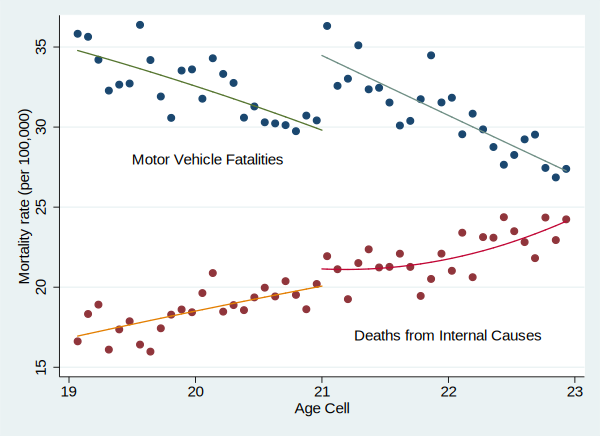





(note: file ./fig45 not found)
(file ./fig45 saved)

(note: file ./fig45.eps not found)
(file ./fig45.eps saved)


In [19]:
twoway (scatter  mva internal agecell) (line exfitqi infitqi agecell if agecell < 21) ///
                                       (line exfitqi infitqi agecell if agecell >= 21), ///
									   legend(off) text(28 20.1 "Motor Vehicle Fatalities") ///
									               text(17 22 "Deaths from Internal Causes")
graph save "./fig45", replace
graph save "./fig45.eps", replace

---
### Table 4.1
---

In [34]:
ssc install outreg2

checking outreg2 consistency and verifying not already installed...
installing into /home/jikhan.jeong/ado/plus/...
installation complete.


In [20]:
* dummy for first month after 21st birthday
gen exactly21 = agecell >= 21 & agecell < 21.1

In [21]:
* doesn't change 
* drop if agecell>20.99 & agecell<21.01

In [22]:
* Other causes
gen ext_oth = external - homicide - suicide - mva

(2 missing values generated)


In [23]:
* Iteration to produce table in each different dependent from 'all' to 'alchol'
foreach x in all mva suicide homicide ext_oth internal alcohol {

reg `x' age over21, robust
if ("`x'"=="all"){
	outreg2 over21 using ./table41.xls, replace bdec(2) sdec(2) noaster excel
}
else{
	outreg2 over21 using ./table41.xls, append  bdec(2) sdec(2) noaster excel
}

reg `x' age age2 over21 over_age over_age2, robust
outreg2 over21 using ./table41.xls, append bdec(2) sdec(2) noaster excel

reg `x' age over21 if agecell >= 20 & agecell <= 22, robust
outreg2 over21 using ./table41.xls, append bdec(2) sdec(2) noaster excel

reg `x' age age2 over21 over_age over_age2 if agecell >= 20 & agecell <= 22, robust
outreg2 over21 using ./table41.xls, append bdec(2) sdec(2) noaster excel

}



Linear regression                               Number of obs     =         48
                                                F(2, 45)          =      32.55
                                                Prob > F          =     0.0000
                                                R-squared         =     0.5946
                                                Root MSE          =      2.493

------------------------------------------------------------------------------
             |               Robust
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.9746843    .663873    -1.47   0.149    -2.311793    .3624247
      over21 |   7.662709   1.514233     5.06   0.000     4.612886    10.71253
       _cons |   91.84137   .7090399   129.53   0.000     90.41329    93.26945
------------------------------------------------------------------------------
./table41.xls

---
### Output:
---
* figure42.eps (Figure 4.2)
* figure44.eps (Figure 4.4)
* figure45.eps (Figure 4.5)
* table41.xls (Table 4.1) This is table format in excel
---
* This replication don't cover **Fuzzy RD**
---

---
# <font color = blue>  Part 2: RDD with R (package rdd)
---
* Ref: https://rpubs.com/cuborican/RDD 
---

In [3]:
install.packages('rdd')

Installing package into ‘/home/jikhan.jeong/lib/R_libs’
(as ‘lib’ is unspecified)


In [1]:
library(AER)

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival


In [4]:
library(foreign)

In [5]:
library(rdd)

Loading required package: Formula


In [7]:
# Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables
library(stargazer)

In [9]:
AEJfigs=read.dta("AEJfigs.dta")

In [13]:
head(AEJfigs)

agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
19.06849,92.82540,91.70615,16.61759,16.73813,76.20782,74.96801,0.6391380,0.7943445,16.31682,16.28457,11.20371,11.59210,35.82933,34.81778,3.872425,3.448835,8.534373,8.388236
19.15068,95.10074,91.88372,18.32768,16.92065,76.77306,74.96307,0.6774093,0.8375749,16.85996,16.27070,12.19337,11.59361,35.63926,34.63389,3.236511,3.470022,8.655786,8.530174
19.23288,92.14429,92.04906,18.91105,17.09884,73.23324,74.95023,0.8664426,0.8778347,15.21925,16.26288,11.71581,11.59513,34.20565,34.44674,3.202071,3.492069,8.513741,8.662681
19.31507,88.42776,92.20214,16.10177,17.27268,72.32598,74.92947,0.8673084,0.9151149,16.74282,16.26115,11.27501,11.59665,32.27896,34.25630,3.280689,3.514980,8.258285,8.785728
19.39726,88.70494,92.34292,17.36352,17.44216,71.34142,74.90076,1.0191631,0.9494066,14.94773,16.26551,10.98431,11.59819,32.65097,34.06259,3.548198,3.538755,8.417533,8.899288
19.47945,90.19179,92.47134,17.87210,17.60725,72.31968,74.86409,1.1713219,0.9807007,15.64281,16.27599,12.16663,11.59973,32.72144,33.86558,3.211689,3.563399,7.972546,9.003332


In [15]:
print(dim(AEJfigs))

[1] 50 19


In [16]:
# Generating centered age (age is a running variable)
AEJfigs$age = AEJfigs$agecell - 21

In [17]:
# Treatment Dummy 
AEJfigs$over21 = ifelse(AEJfigs$agecell >= 21,1,0)

In [18]:
# Linear Sharp RDD
# all = all deapth as dependent variable
# agecell = age variable not centered
# cutpoint = age 21
reg.1=RDestimate(all~agecell,data=AEJfigs,cutpoint = 21)

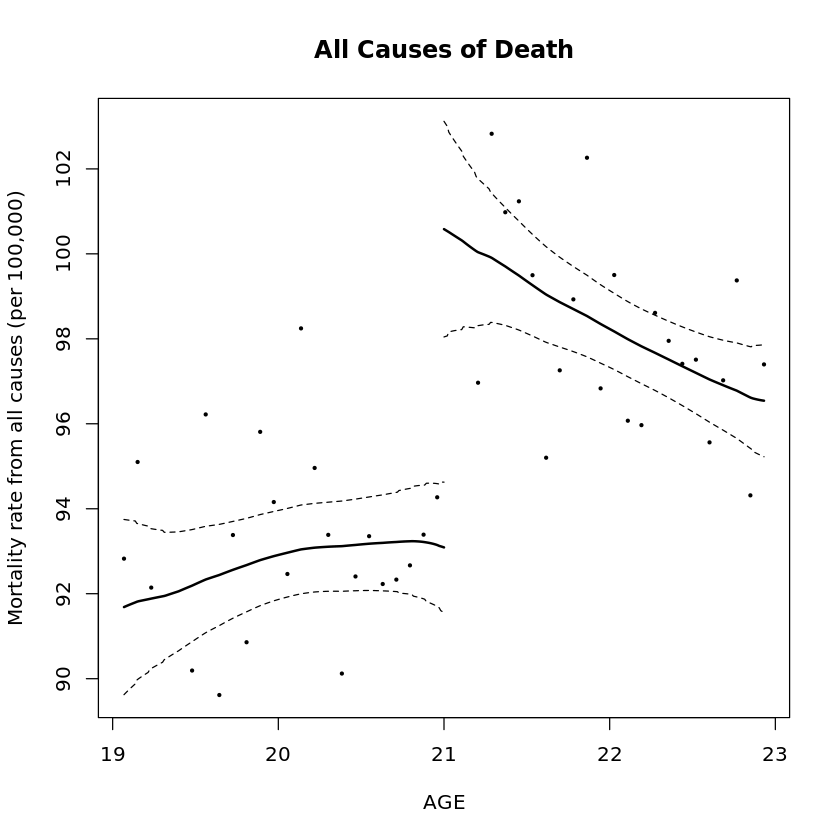

In [19]:
plot(reg.1)
title(main="All Causes of Death", xlab="AGE",ylab="Mortality rate from all causes (per 100,000)")

In [20]:
# Linear Sharp RDD
# LATE = local average treatment : Estimate 9.001
summary(reg.1)


Call:
RDestimate(formula = all ~ agecell, data = AEJfigs, cutpoint = 21)

Type:
sharp 

Estimates:
           Bandwidth  Observations  Estimate  Std. Error  z value  Pr(>|z|) 
LATE       1.6561     40            9.001     1.480       6.080    1.199e-09
Half-BW    0.8281     20            9.579     1.914       5.004    5.609e-07
Double-BW  3.3123     48            7.953     1.278       6.223    4.882e-10
              
LATE       ***
Half-BW    ***
Double-BW  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

F-statistics:
           F      Num. DoF  Denom. DoF  p        
LATE       33.08  3         36          3.799e-10
Half-BW    29.05  3         16          2.078e-06
Double-BW  32.54  3         44          6.129e-11


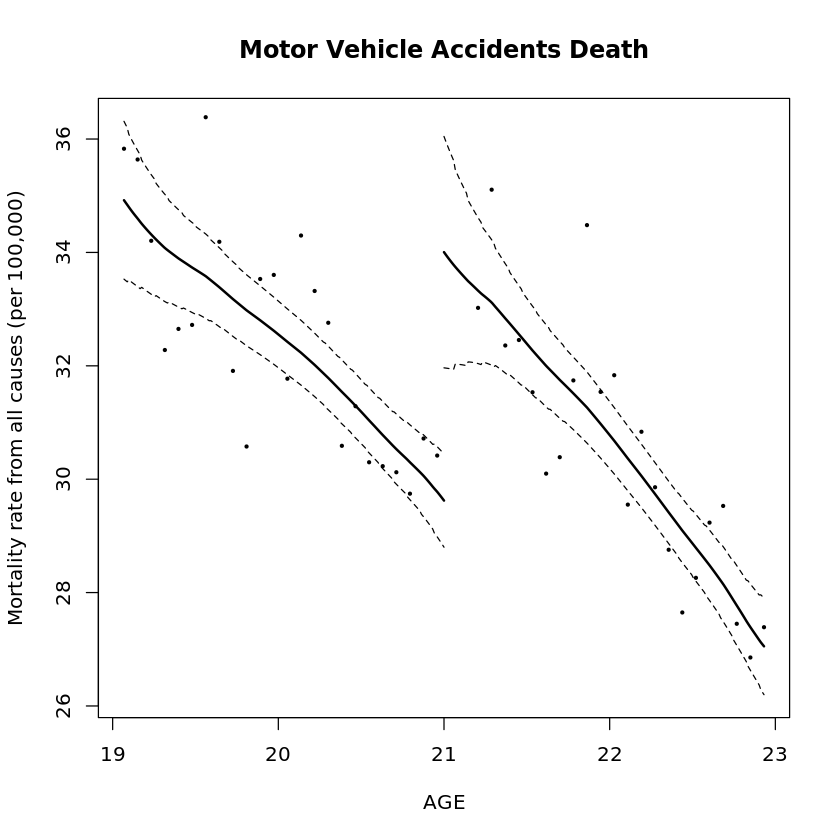

In [21]:
# Linear Sharp RDD with Motor Vehicle Accidents Death (MVA)
reg.2=RDestimate(mva~agecell,data=AEJfigs,cutpoint = 21)
plot(reg.2)
title(main="Motor Vehicle Accidents Death", xlab="AGE",ylab="Mortality rate from all causes (per 100,000)")

In [24]:
summary(reg.2)


Call:
RDestimate(formula = mva ~ agecell, data = AEJfigs, cutpoint = 21)

Type:
sharp 

Estimates:
           Bandwidth  Observations  Estimate  Std. Error  z value  Pr(>|z|) 
LATE       1.2109     30            4.977     1.0590      4.700    2.607e-06
Half-BW    0.6054     14            4.956     1.3767      3.600    3.182e-04
Double-BW  2.4218     48            4.566     0.7086      6.444    1.162e-10
              
LATE       ***
Half-BW    ***
Double-BW  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

F-statistics:
           F      Num. DoF  Denom. DoF  p        
LATE       13.32  3         26          3.692e-05
Half-BW    12.76  3         10          1.879e-03
Double-BW  26.99  3         44          9.322e-10


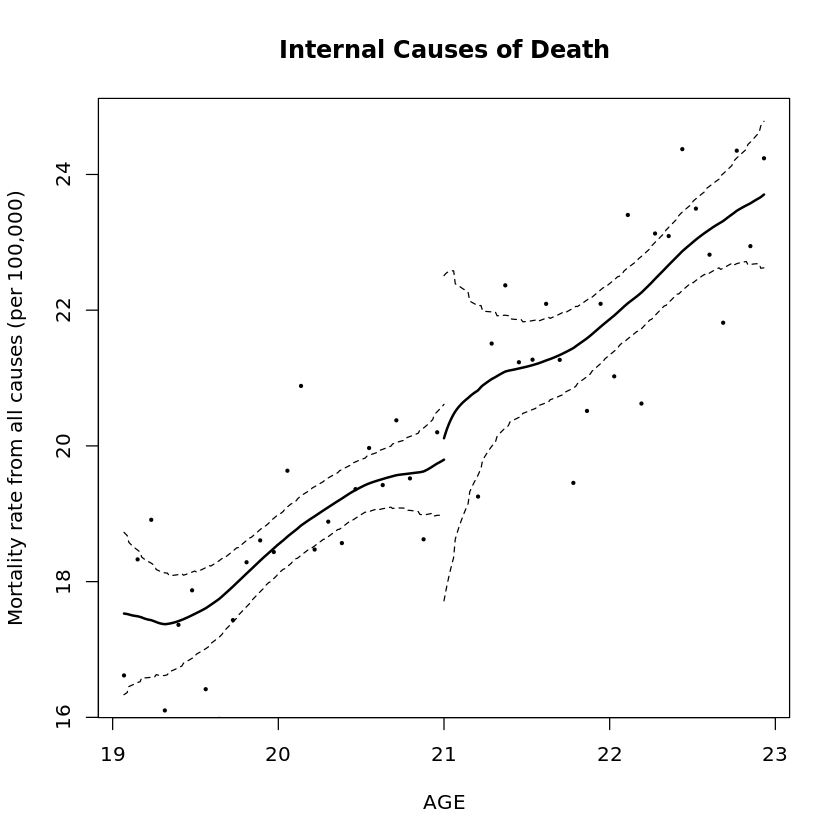

In [22]:
# Linear Sharp RDD with Internal Causes of Death (such as disease)
reg.3=RDestimate(internal~agecell,data=AEJfigs,cutpoint = 21)
plot(reg.3)
title(main="Internal Causes of Death", xlab="AGE",ylab="Mortality rate from all causes (per 100,000)")

In [23]:
summary(reg.3)


Call:
RDestimate(formula = internal ~ agecell, data = AEJfigs, cutpoint = 21)

Type:
sharp 

Estimates:
           Bandwidth  Observations  Estimate  Std. Error  z value  Pr(>|z|)   
LATE       0.8809     22            1.4128    0.8206      1.722    0.08513   .
Half-BW    0.4405     10            1.8691    1.0203      1.832    0.06698   .
Double-BW  1.7618     42            0.7652    0.6179      1.239    0.21553    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

F-statistics:
           F       Num. DoF  Denom. DoF  p        
LATE        6.830  3         18          5.734e-03
Half-BW     1.765  3          6          5.068e-01
Double-BW  22.695  3         38          2.750e-08


In [25]:
stargazer(reg.3, text)

ERROR: Error: object of type 'closure' is not subsettable
